<a href="https://colab.research.google.com/github/SabAneesah/machine-vision-intensity-transformations/blob/main/Machine_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Vision Assignment 1**

Mount Google Drive and Access Folder

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to your 'images' folder in Google Drive
image_folder_path = '/content/drive/MyDrive/Images'

# Ensure the folder exists
if not os.path.exists(image_folder_path):
    print(f"Error: The folder '{image_folder_path}' does not exist. Please check the path and ensure it's created and accessible.")
else:
    print(f"Accessing folder: {image_folder_path}")

Accessing folder: /content/drive/MyDrive/Images


Now, list all files in the folder, filter for common image file extensions, and load them. Display the first few images to confirm they are loaded correctly.

Found 13 images in '/content/drive/MyDrive/Images'.


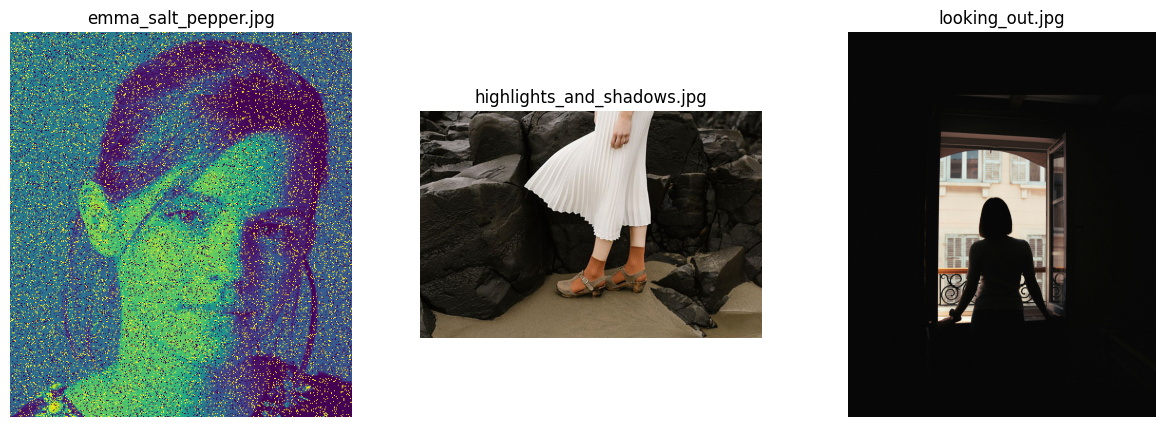

In [55]:
loaded_images = []
image_filenames = []
valid_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp')

if os.path.exists(image_folder_path):
    for filename in os.listdir(image_folder_path):
        if filename.lower().endswith(valid_extensions):
            try:
                img_path = os.path.join(image_folder_path, filename)
                img = Image.open(img_path)
                loaded_images.append(img)
                image_filenames.append(filename)
            except Exception as e:
                print(f"Could not load image {filename}: {e}")

    print(f"Found {len(loaded_images)} images in '{image_folder_path}'.")

    # Display the first few loaded images (e.g., up to 3)
    if loaded_images:
        num_to_display = min(len(loaded_images), 3)
        plt.figure(figsize=(15, 5))
        for i in range(num_to_display):
            plt.subplot(1, num_to_display, i + 1)
            plt.imshow(loaded_images[i])
            plt.title(image_filenames[i])
            plt.axis('off')
        plt.show()
    else:
        print("No images found or loaded.")
else:
    print("Cannot list files as the folder path was not found.")

Load the Libraries

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [59]:
def show(img, title='', cmap='gray'):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')

Load runway image

In [62]:
img = cv2.imread('/content/drive/MyDrive/Images/runway.png', cv2.IMREAD_GRAYSCALE)
img_n = img / 255.0

1. Intensity Transformations (Runway Image)
  (a) & (b) Gamma correction (γ = 0.5, 2)

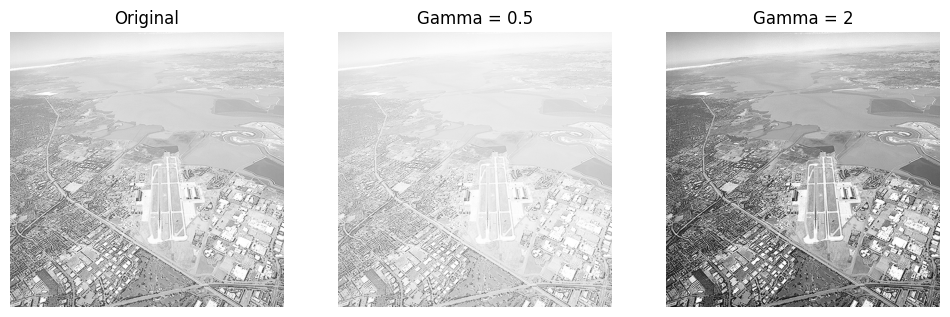

In [63]:
def gamma_correction(img, gamma):
    return np.power(img, gamma)

gamma_05 = gamma_correction(img_n, 0.5)
gamma_2 = gamma_correction(img_n, 2.0)

plt.figure(figsize=(12,4))
plt.subplot(131); show(img_n, 'Original')
plt.subplot(132); show(gamma_05, 'Gamma = 0.5')
plt.subplot(133); show(gamma_2, 'Gamma = 2')
plt.show()


  (c) Contrast Stretching

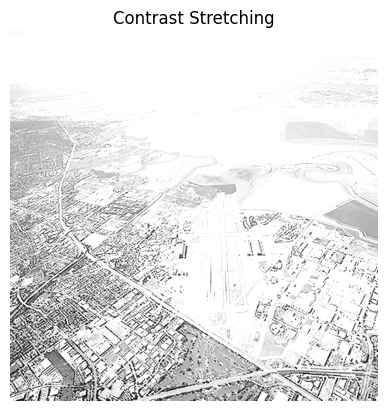

In [64]:
def contrast_stretch(img, r1=0.2, r2=0.8):
    s = np.zeros_like(img)
    s[img < r1] = 0
    s[(img >= r1) & (img <= r2)] = (img[(img >= r1) & (img <= r2)] - r1) / (r2 - r1)
    s[img > r2] = 1
    return s

cs = contrast_stretch(img_n)

show(cs, 'Contrast Stretching')
plt.show()


2️. Gamma on L* channel (L*A*B* color space with gamma = 0.6)

In [66]:
color = cv2.imread('/content/drive/MyDrive/Images/highlights_and_shadows.jpg')
lab = cv2.cvtColor(color, cv2.COLOR_BGR2LAB)
L, A, B = cv2.split(lab)

L_n = L / 255.0
gamma = 0.6
L_gamma = (gamma_correction(L_n, gamma) * 255).astype(np.uint8)

lab_gamma = cv2.merge([L_gamma, A, B])
img_gamma = cv2.cvtColor(lab_gamma, cv2.COLOR_LAB2BGR)


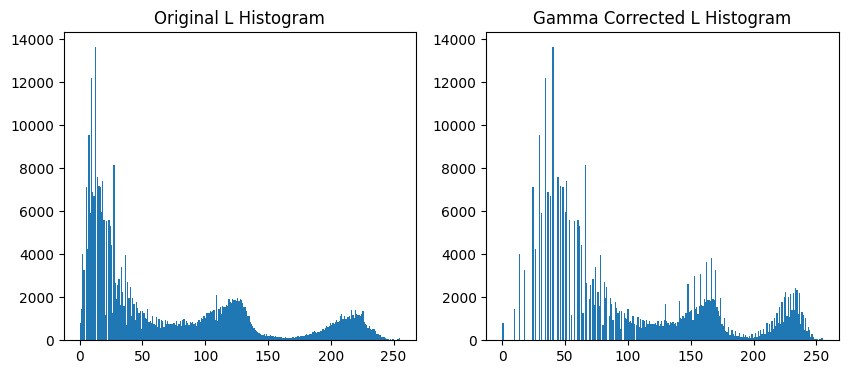

In [67]:
plt.figure(figsize=(10,4))
plt.subplot(121); plt.hist(L.flatten(), bins=256)
plt.title("Original L Histogram")
plt.subplot(122); plt.hist(L_gamma.flatten(), bins=256)
plt.title("Gamma Corrected L Histogram")
plt.show()

3️. Manual Histogram Equalization

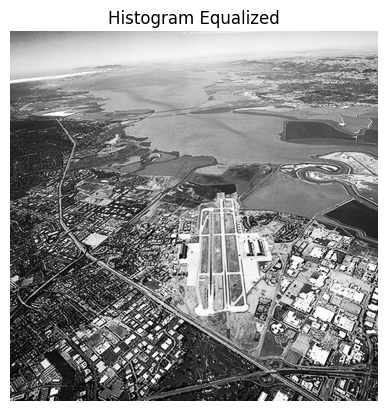

In [68]:
def manual_hist_eq(img):
    hist, _ = np.histogram(img.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf = cdf.astype('uint8')
    return cdf[img]

eq = manual_hist_eq(img)

show(eq, 'Histogram Equalized')
plt.show()
